In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/bitcoindata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    14 non-null     object 
 1   Open    14 non-null     float64
dtypes: float64(1), object(1)
memory usage: 356.0+ bytes


In [ ]:
df.head()

,Date,Open
0,18-05-2019,7266.080078
1,19-05-2019,8193.139648
2,20-05-2019,7998.290039
3,21-05-2019,7947.930176
4,22-05-2019,7626.890137


In [ ]:
df = pd.read_csv('/content/bitcoindata.csv',
                 parse_dates=True,
                 dayfirst=True,
                 index_col='Date'
                 )

print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14 entries, 2019-05-18 to 2019-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    14 non-null     float64
dtypes: float64(1)
memory usage: 224.0 bytes
None


,Open
Date,
2019-05-18,7266.080078
2019-05-19,8193.139648
2019-05-20,7998.290039
2019-05-21,7947.930176
2019-05-22,7626.890137


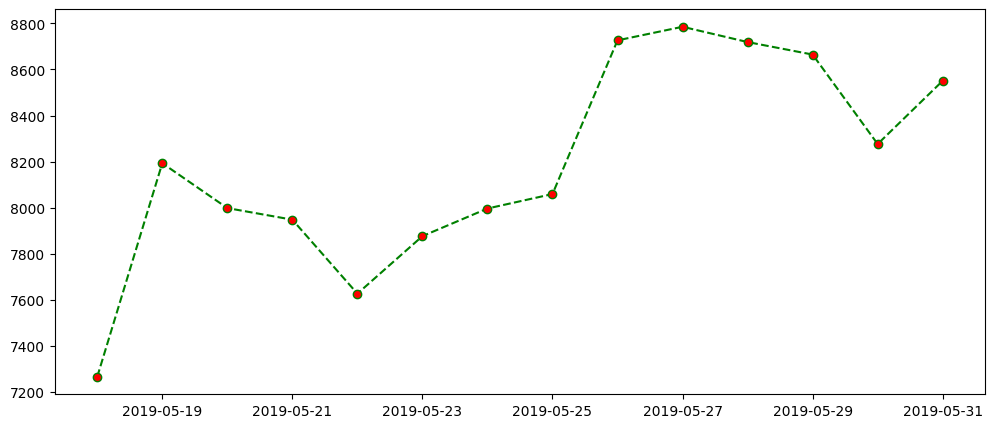

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df['Open'],marker='o',mfc='r',c='g',ls='--')
# by default x axis is the index of the dataframe

In [ ]:
df.index.day , df.index.month, df.index.year, df.index.day_name()

(Index([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], dtype='int32', name='Date'),
 Index([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype='int32', name='Date'),
 Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
        2019, 2019],
       dtype='int32', name='Date'),
 Index(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
        'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
        'Thursday', 'Friday'],
       dtype='object', name='Date'))

In [ ]:
# 3 days moving average (3dma)    calculate average of 3 days and show in 3rd day's row....
# can be 5dma, 20 dma according to industrial complainces
df['Open'].rolling(3).mean()

,Open
Date,
2019-05-18,NaN
2019-05-19,NaN
2019-05-20,7819.169922
2019-05-21,8046.453288
2019-05-22,7857.703451
2019-05-23,7817.106771
2019-05-24,7833.263346
2019-05-25,7977.343262
2019-05-26,8260.586751


In [ ]:
# difference by default 1 day interval,means difference of 1st and 2nd day, displayed in the 2nd day's row

df['Open'].diff()
# df['Open'].diff(2)

,Open
Date,
2019-05-18,NaN
2019-05-19,927.059570
2019-05-20,-194.849609
2019-05-21,-50.359863
2019-05-22,-321.040039
2019-05-23,249.609863
2019-05-24,119.899902
2019-05-25,62.729981
2019-05-26,667.100586


In [ ]:
df['Open'].pct_change(1)

,Open
Date,
2019-05-18,NaN
2019-05-19,0.127587
2019-05-20,-0.023782
2019-05-21,-0.006296
2019-05-22,-0.040393
2019-05-23,0.032728
2019-05-24,0.015222
2019-05-25,0.007845
2019-05-26,0.082776


In [ ]:
df['3dma'] = df['Open'].rolling(3).mean()
df

,Open,3dma
Date,,
2019-05-18,7266.080078,NaN
2019-05-19,8193.139648,NaN
2019-05-20,7998.290039,7819.169922
2019-05-21,7947.930176,8046.453288
2019-05-22,7626.890137,7857.703451
2019-05-23,7876.500000,7817.106771
2019-05-24,7996.399902,7833.263346
2019-05-25,8059.129883,7977.343262
2019-05-26,8726.230469,8260.586751


In [ ]:
# but the average of 3 days will be available after the 3rd day is ended,
# so to make it senseful we have to shift the values by 1

df['3dma'] = df['Open'].rolling(3).mean()
df['3dma'] = df['3dma'].shift(1)
df

,Open,3dma
Date,,
2019-05-18,7266.080078,NaN
2019-05-19,8193.139648,NaN
2019-05-20,7998.290039,NaN
2019-05-21,7947.930176,7819.169922
2019-05-22,7626.890137,8046.453288
2019-05-23,7876.500000,7857.703451
2019-05-24,7996.399902,7817.106771
2019-05-25,8059.129883,7833.263346
2019-05-26,8726.230469,7977.343262


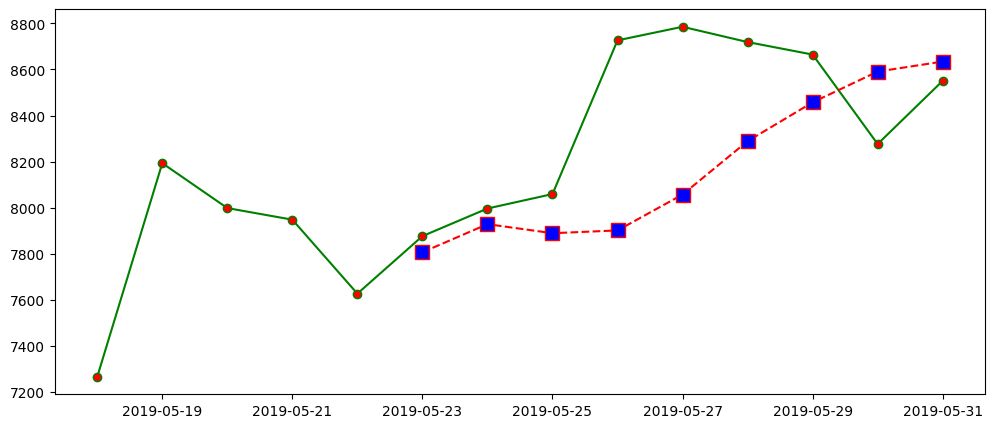

In [ ]:
from matplotlib.typing import MarkerType
plt.figure(figsize=(12,5))
plt.plot(df['Open'],marker='o',mfc='r',c='g')
plt.plot(df['Open'].rolling(5).mean().shift(1), marker='s', mfc='b',c='r',ls='--', markersize=10)

In [ ]:
# Time series is a sequence of metrics which is created in a time interval
# can be on basis :
# yearly, quarterly, monthly, weekly, daily, hourly, minute, second


In [ ]:
# exponential smoothing - Holt Winter
# current timestamp will have max weight,
# previous one will have less weight, previous than that will have least weight

# it is called as weighted moving average


# timestamp before each timestamp is called Lag.


